In [5]:
from statsmodels.tsa.arima_model import ARIMA,ARMA,ARMAResults,ARIMAResults
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 

In [6]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf 

In [7]:
from pmdarima import auto_arima

In [10]:
df1 = pd.read_csv('CSVs/DailyTotalFemaleBirths.csv',index_col='Date',parse_dates=True)
df1.index.freq = 'D'
df1 = df1[:120]

In [11]:
df2 = pd.read_csv('CSVs/TradeInventories.csv',index_col='Date',parse_dates=True)
df2.index.freq = 'MS'

# ARMA

<Axes: xlabel='Date'>

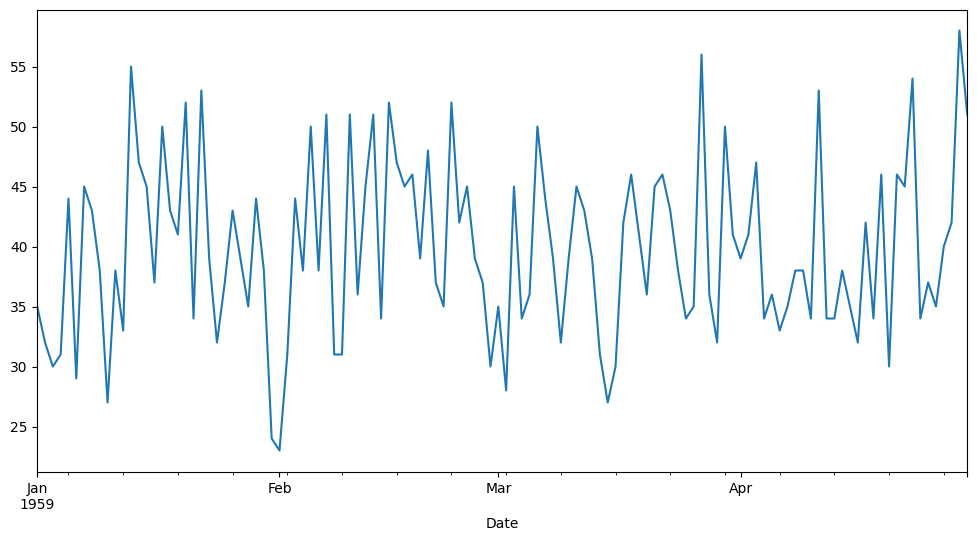

In [12]:
df1['Births'].plot(figsize=(12,6))

In [14]:
from statsmodels.tsa.stattools import adfuller

def adf_test(series,title=''):
    """
    Pass in a time series and an optional title, returns an ADF report
    """
    print(f'Augmented Dickey-Fuller Test: {title}')
    result = adfuller(series.dropna(),autolag='AIC') # .dropna() handles differenced data
    
    labels = ['ADF test statistic','p-value','# lags used','# observations']
    out = pd.Series(result[0:4],index=labels)

    for key,val in result[4].items():
        out[f'critical value ({key})']=val
        
    print(out.to_string())          # .to_string() removes the line "dtype: float64"
    
    if result[1] <= 0.05:
        print("Strong evidence against the null hypothesis")
        print("Reject the null hypothesis")
        print("Data has no unit root and is stationary")
    else:
        print("\nWeak evidence against the null hypothesis")
        print("Fail to reject the null hypothesis")
        print("Data has a unit root and is non-stationary")

In [15]:
adf_test(df1['Births'])

Augmented Dickey-Fuller Test: 
ADF test statistic     -9.855384e+00
p-value                 4.373545e-17
# lags used             0.000000e+00
# observations          1.190000e+02
critical value (1%)    -3.486535e+00
critical value (5%)    -2.886151e+00
critical value (10%)   -2.579896e+00
Strong evidence against the null hypothesis
Reject the null hypothesis
Data has no unit root and is stationary


In [16]:
auto_arima(df1['Births'],seasonal=False).summary()

c:\Users\aryan.katoch\AppData\Local\anaconda3\envs\annproject\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\aryan.katoch\AppData\Local\anaconda3\envs\annproject\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\aryan.katoch\AppData\Local\anaconda3\envs\annproject\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\aryan.katoch\AppData\Local\anaconda3\envs\annproject\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\aryan.katoch\AppData\Local\anaconda3\envs\annprojec

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  120
Model:                        SARIMAX   Log Likelihood                -409.745
Date:                Fri, 02 May 2025   AIC                            823.489
Time:                        16:41:14   BIC                            829.064
Sample:                    01-01-1959   HQIC                           825.753
                         - 04-30-1959                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     39.7833      0.687     57.896      0.000      38.437      41.130
sigma2        54.1197      8.319      6.506      0.000      37.815      70.424
===================================================================================
Ljung-Box (L1) (Q):                   0.85   Jarque-Bera (JB):                 2.69
Prob(Q):                              0.36   Prob(JB):                         0.26
Heteroskedasticity (H):               0.80   Skew:                             0.26
Prob(H) (two-sided):                  0.48   Kurtosis:                         2.48
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [17]:
#spliting to train and test
train = df1.iloc[:90]
test = df1.iloc[90:]

In [18]:
model = ARMA(train['Births'],order=(2,2))
model.fit() 

NotImplementedError: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been removed in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and statsmodels.tsa.SARIMAX.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained. It also offers alternative specialized
parameter estimators.


In [20]:
from statsmodels.tsa.arima.model import ARIMA

# ARMA(2,2) is equivalent to ARIMA(p=2, d=0, q=2)
model = ARIMA(train['Births'], order=(2, 0, 2))
results = model.fit()
print(results.summary())


                               SARIMAX Results                                
Dep. Variable:                 Births   No. Observations:                   90
Model:                 ARIMA(2, 0, 2)   Log Likelihood                -307.812
Date:                Fri, 02 May 2025   AIC                            627.625
Time:                        16:54:34   BIC                            642.624
Sample:                    01-01-1959   HQIC                           633.673
                         - 03-31-1959                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         39.7575      1.017     39.087      0.000      37.764      41.751
ar.L1         -0.4655      1.003     -0.464      0.643      -2.431       1.500
ar.L2          0.5086      0.940      0.541      0.5

In [21]:
start = len(train)
end = len(train) + len(test) - 1

In [22]:
predictions = results.predict(start=start, end=end).rename('ARMA(2,2) Predictions')

<Axes: xlabel='Date'>

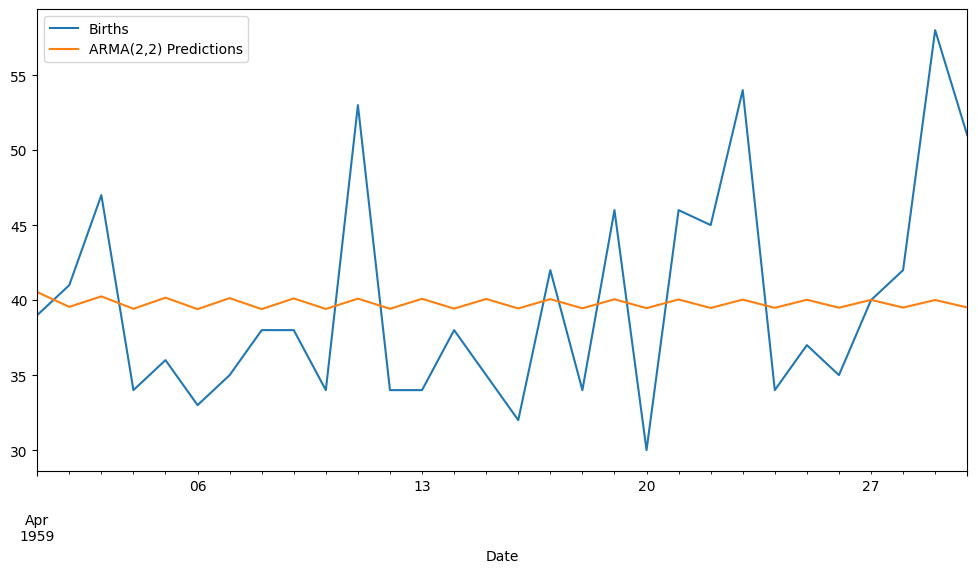

In [25]:
test['Births'].plot(figsize=(12,6),legend=True)
predictions.plot(legend=True)

In [27]:
test.mean()

Births    39.833333
dtype: float64

In [26]:
predictions.mean()


39.785842363848225

<Axes: xlabel='Date'>

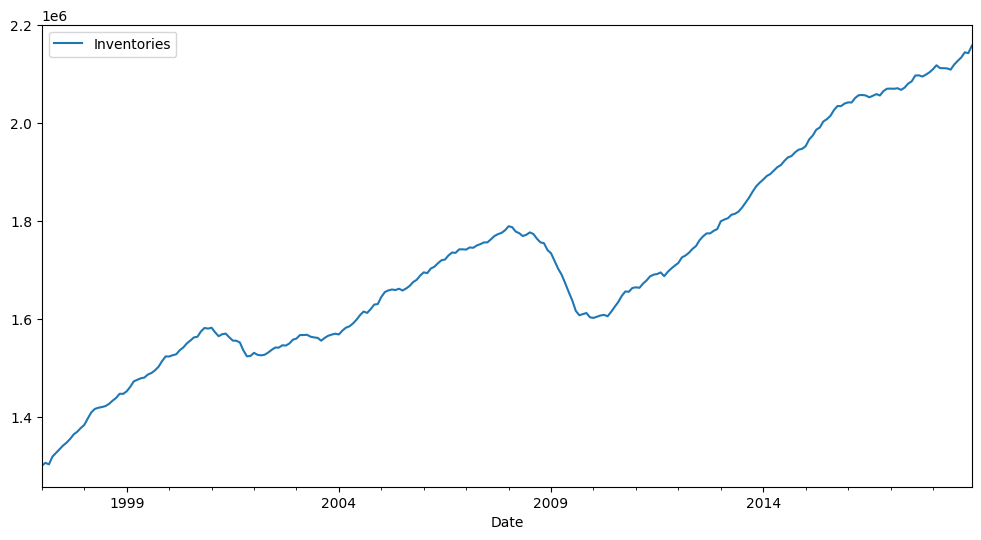

In [30]:
df2.plot(figsize=(12,6),legend=True)

In [31]:
from statsmodels.tsa.seasonal import seasonal_decompose

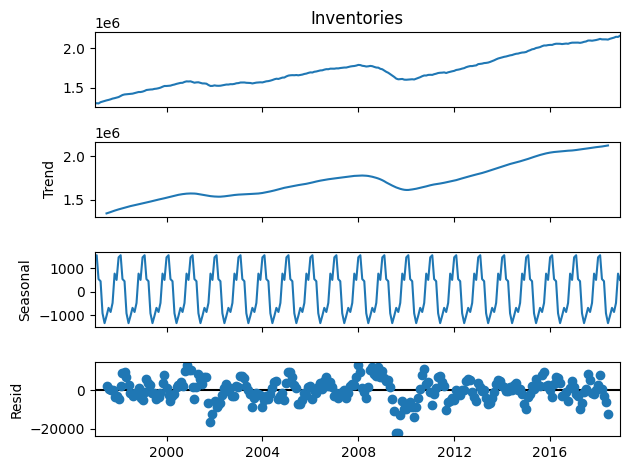

In [33]:
result = seasonal_decompose(df2['Inventories'],model='additive')
result.plot();

In [34]:
auto_arima(df2['Inventories'],seasonal=False).summary()

c:\Users\aryan.katoch\AppData\Local\anaconda3\envs\annproject\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\aryan.katoch\AppData\Local\anaconda3\envs\annproject\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\aryan.katoch\AppData\Local\anaconda3\envs\annproject\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\aryan.katoch\AppData\Local\anaconda3\envs\annproject\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\aryan.katoch\AppData\Local\anaconda3\envs\annprojec

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  264
Model:               SARIMAX(0, 1, 0)   Log Likelihood               -2672.018
Date:                Fri, 02 May 2025   AIC                           5348.037
Time:                        17:10:55   BIC                           5355.181
Sample:                    01-01-1997   HQIC                          5350.908
                         - 12-01-2018                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   3258.3802    470.991      6.918      0.000    2335.255    4181.506
sigma2       3.91e+07   2.95e+06     13.250      0.000    3.33e+07    4.49e+07
===================================================================================
Ljung-Box (L1) (Q):                  82.61   Jarque-Bera (JB):               100.74
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.86   Skew:                            -1.15
Prob(H) (two-sided):                  0.48   Kurtosis:                         4.98
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [35]:
from statsmodels.tsa.statespace.tools import diff

In [36]:
df2['Diff_1'] = diff(df2['Inventories'],k_diff=1)

In [37]:
adf_test(df2['Diff_1'])

Augmented Dickey-Fuller Test: 
ADF test statistic       -3.412249
p-value                   0.010548
# lags used               4.000000
# observations          258.000000
critical value (1%)      -3.455953
critical value (5%)      -2.872809
critical value (10%)     -2.572775
Strong evidence against the null hypothesis
Reject the null hypothesis
Data has no unit root and is stationary


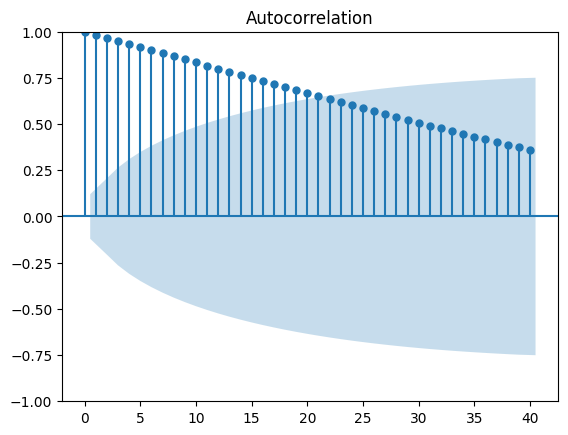

In [40]:
plot_acf(df2['Inventories'],lags=40) ;

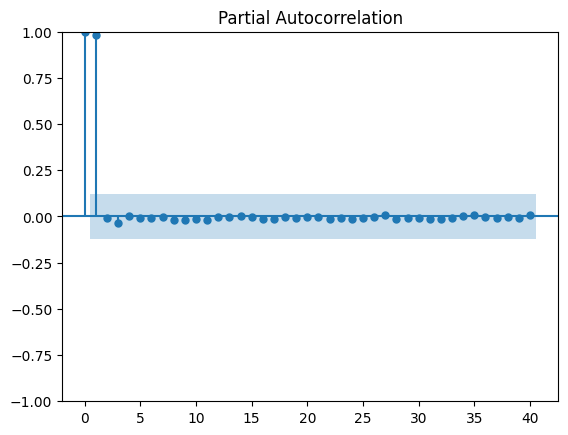

In [41]:
plot_pacf(df2['Inventories'],lags=40) ;

# to read which parameters to use 
https://people.duke.edu/~rnau/411arim3.htm

In [42]:
# AR = 1
# I = 
# MA =0 or 1 less error

In [43]:
stepwise_fit = auto_arima(df2['Inventories'],start_p=0,start_q=0,max_p=2,max_q=2,seasonal=False,trace=True)
stepwise_fit.summary()

c:\Users\aryan.katoch\AppData\Local\anaconda3\envs\annproject\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\aryan.katoch\AppData\Local\anaconda3\envs\annproject\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\aryan.katoch\AppData\Local\anaconda3\envs\annproject\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\aryan.katoch\AppData\Local\anaconda3\envs\annproject\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\aryan.katoch\AppData\Local\anaconda3\envs\annprojec

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=5348.037, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=5399.843, Time=0.04 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=5350.241, Time=0.04 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=5409.217, Time=0.02 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=5378.835, Time=0.14 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0] intercept
Total fit time: 0.267 seconds


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  264
Model:               SARIMAX(0, 1, 0)   Log Likelihood               -2672.018
Date:                Fri, 02 May 2025   AIC                           5348.037
Time:                        17:36:03   BIC                           5355.181
Sample:                    01-01-1997   HQIC                          5350.908
                         - 12-01-2018                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   3258.3802    470.991      6.918      0.000    2335.255    4181.506
sigma2       3.91e+07   2.95e+06     13.250      0.000    3.33e+07    4.49e+07
===================================================================================
Ljung-Box (L1) (Q):                  82.61   Jarque-Bera (JB):               100.74
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.86   Skew:                            -1.15
Prob(H) (two-sided):                  0.48   Kurtosis:                         4.98
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [44]:
len(df2)

264

In [45]:
train = df2.iloc[:252]
test = df2.iloc[252:]

In [48]:
model = ARIMA(train['Inventories'],order=(1,1,1))
results = model.fit()
results.summary()

c:\Users\aryan.katoch\AppData\Local\anaconda3\envs\annproject\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:            Inventories   No. Observations:                  252
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -2550.368
Date:                Fri, 02 May 2025   AIC                           5106.737
Time:                        17:41:50   BIC                           5117.313
Sample:                    01-01-1997   HQIC                          5110.993
                         - 12-01-2017                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.0000      0.002    596.023      0.000       0.997       1.003
ma.L1         -0.9999      0.045    -22.387      0.000      -1.087      -0.912
sigma2      4.008e+07   2.06e-10   1.94e+17      0.000    4.01e+07    4.01e+07
===================================================================================
Ljung-Box (L1) (Q):                  87.24   Jarque-Bera (JB):                99.20
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.74   Skew:                            -1.17
Prob(H) (two-sided):                  0.18   Kurtosis:                         5.00
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 5.62e+34. Standard errors may be unstable.
"""

c:\Users\aryan.katoch\AppData\Local\anaconda3\envs\annproject\Lib\site-packages\statsmodels\tsa\statespace\representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['typ']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


<Axes: xlabel='Date'>

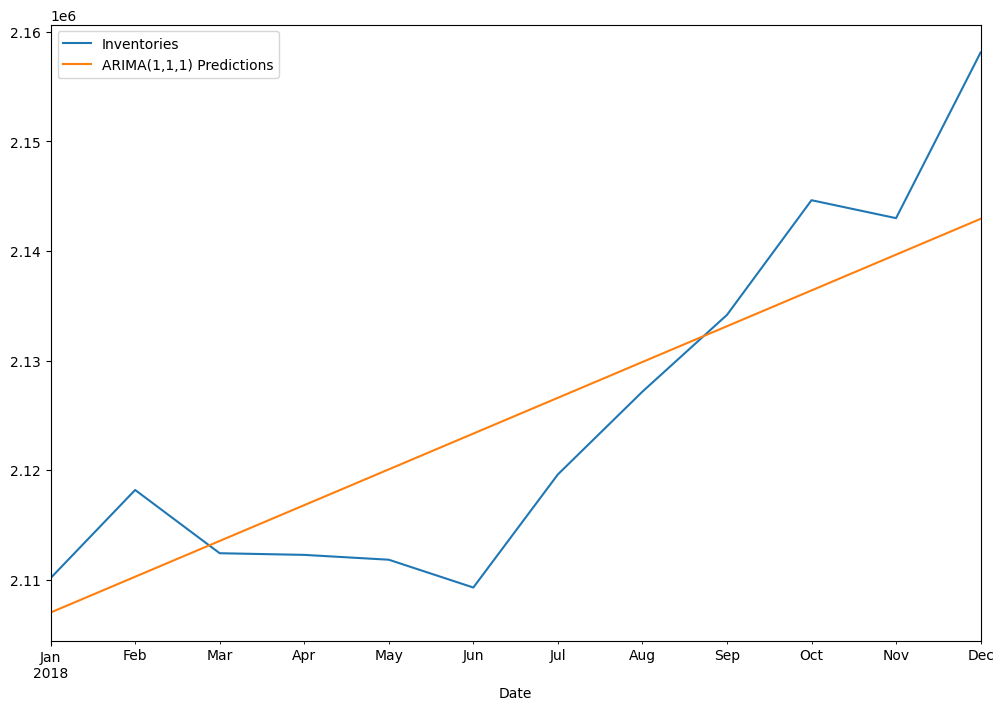

In [50]:
start = len(train)
end = len(train) + len(test) - 1

predictions = results.predict(start=start, end=end,typ='levels').rename('ARIMA(1,1,1) Predictions')

test['Inventories'].plot(figsize=(12,8),legend=True)
predictions.plot(legend=True)

In [52]:
from statsmodels.tools.eval_measures import rmse

In [53]:
error=rmse(test['Inventories'],predictions)
error

7778.810275617071

In [55]:
test.mean()

Inventories    2.125076e+06
Diff_1         4.530333e+03
dtype: float64

# Forecast into unknow future

In [56]:
model = ARIMA(df2['Inventories'],order=(1,1,1))
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:            Inventories   No. Observations:                  264
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -2672.382
Date:                Fri, 02 May 2025   AIC                           5350.763
Time:                        17:45:25   BIC                           5361.479
Sample:                    01-01-1997   HQIC                          5355.070
                         - 12-01-2018                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.0000      0.002    551.599      0.000       0.996       1.004
ma.L1         -0.9998      0.020    -50.200      0.000      -1.039      -0.961
sigma2      3.924e+07   1.49e-11   2.63e+18      0.000    3.92e+07    3.92e+07
===================================================================================
Ljung-Box (L1) (Q):                  82.61   Jarque-Bera (JB):                95.27
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.90   Skew:                            -1.12
Prob(H) (two-sided):                  0.63   Kurtosis:                         4.91
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.08e+34. Standard errors may be unstable.
"""

In [57]:
fcast = results.predict(start=len(df2),end=len(df2)+11,typ='levels').rename('ARIMA(1,1,1) Forecast')

c:\Users\aryan.katoch\AppData\Local\anaconda3\envs\annproject\Lib\site-packages\statsmodels\tsa\statespace\representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['typ']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


<Axes: xlabel='Date'>

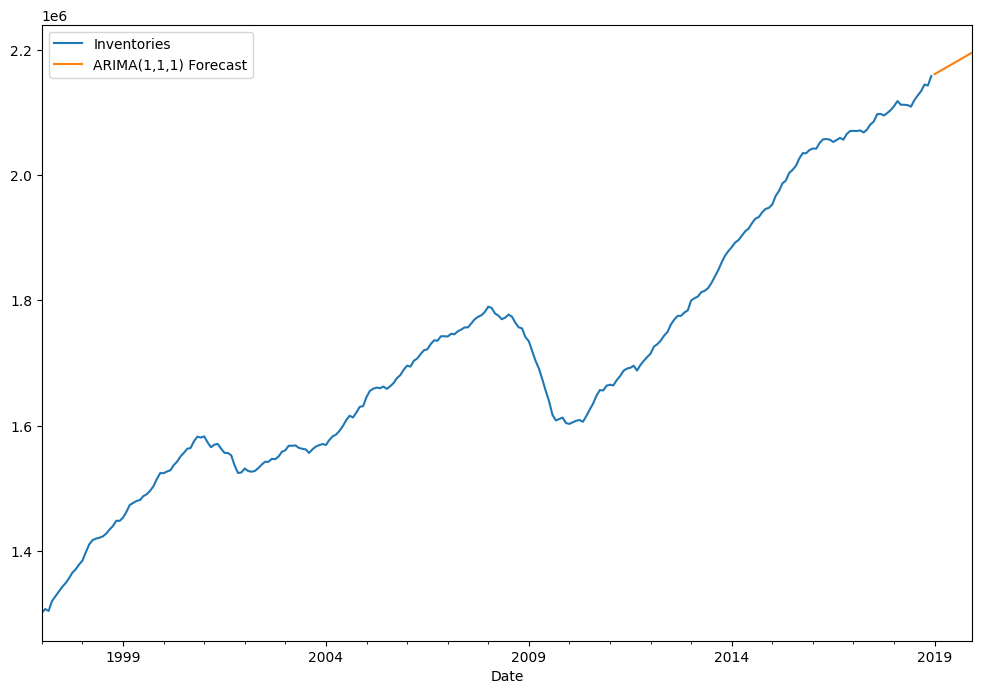

In [58]:
df2['Inventories'].plot(figsize=(12,8),legend=True)
fcast.plot(legend=True)